In [1]:
import pandas as pd, numpy as np

import seaborn as sns, matplotlib.pyplot as plt

from scipy.stats import ttest_ind, f_oneway, chi2_contingency, norm

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Load Dataset

In [2]:
!gdown 1YAdAD5G3uOhBEpnzEAVPwJXIa3-f7TP9

Downloading...
From: https://drive.google.com/uc?id=1YAdAD5G3uOhBEpnzEAVPwJXIa3-f7TP9
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 56.8MB/s]


In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

#EDA

In [6]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [7]:
df.isna().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


<font size='5'> No null values

In [8]:
np.round(df.describe(),2)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00
mean,41.75,0.42,0.47,0.06,0.18,168.18,76.95,0.22,0.12,0.67,24336.71
std,13.96,0.49,0.50,0.23,0.38,10.10,14.27,0.41,0.32,0.75,6248.18
min,18.00,0.00,0.00,0.00,0.00,145.00,51.00,0.00,0.00,0.00,15000.00
25%,30.00,0.00,0.00,0.00,0.00,161.00,67.00,0.00,0.00,0.00,21000.00
50%,42.00,0.00,0.00,0.00,0.00,168.00,75.00,0.00,0.00,1.00,23000.00
75%,53.00,1.00,1.00,0.00,0.00,176.00,87.00,0.00,0.00,1.00,28000.00
max,66.00,1.00,1.00,1.00,1.00,188.00,132.00,1.00,1.00,3.00,40000.00


###a. Distribution Analysis:
To understand the distribution of numerical features like Age, Height, Weight, and PremiumPrice, plot histograms and boxplots.

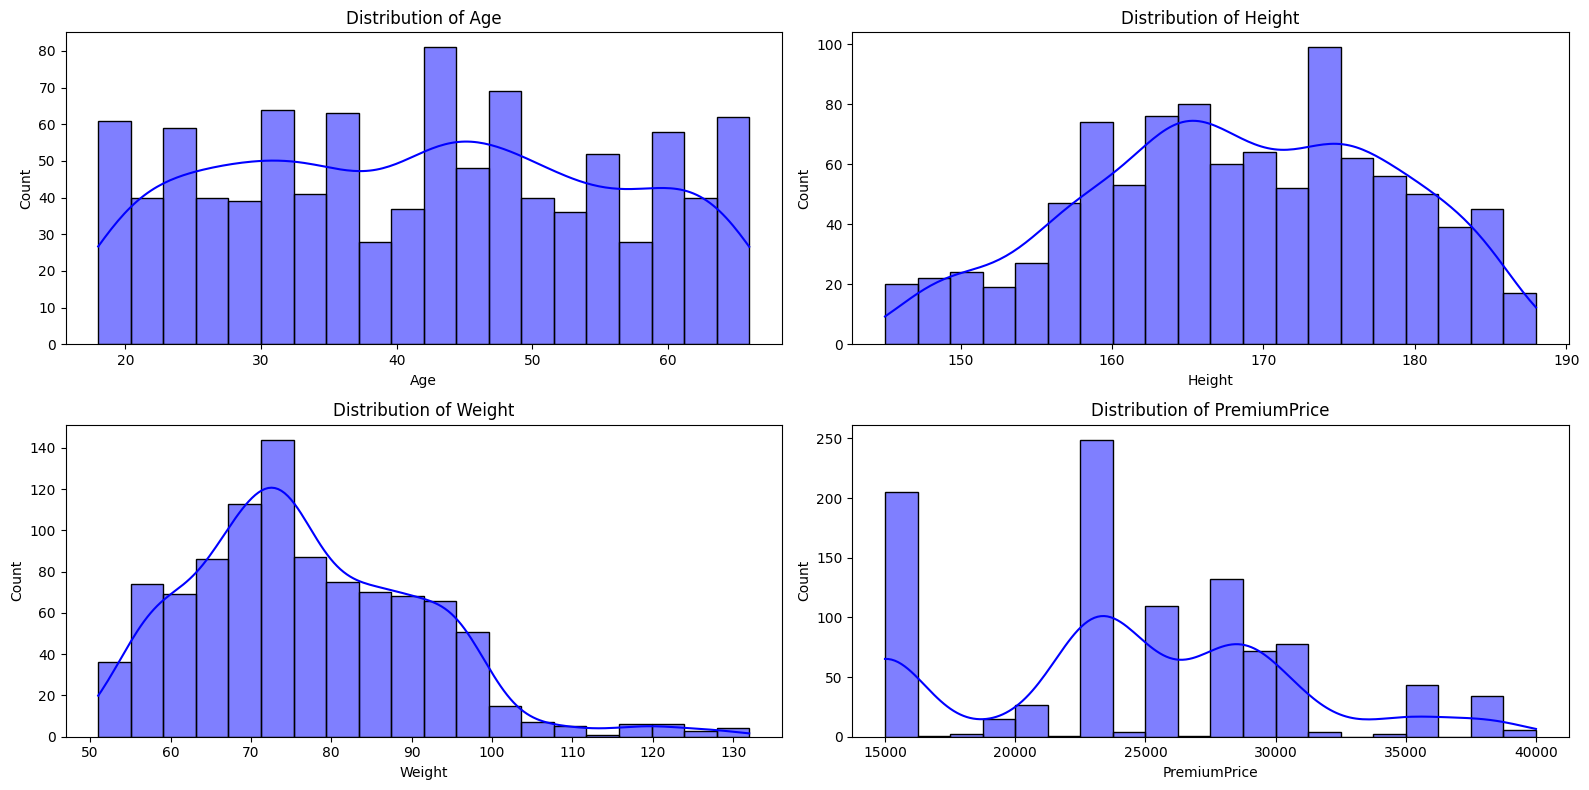

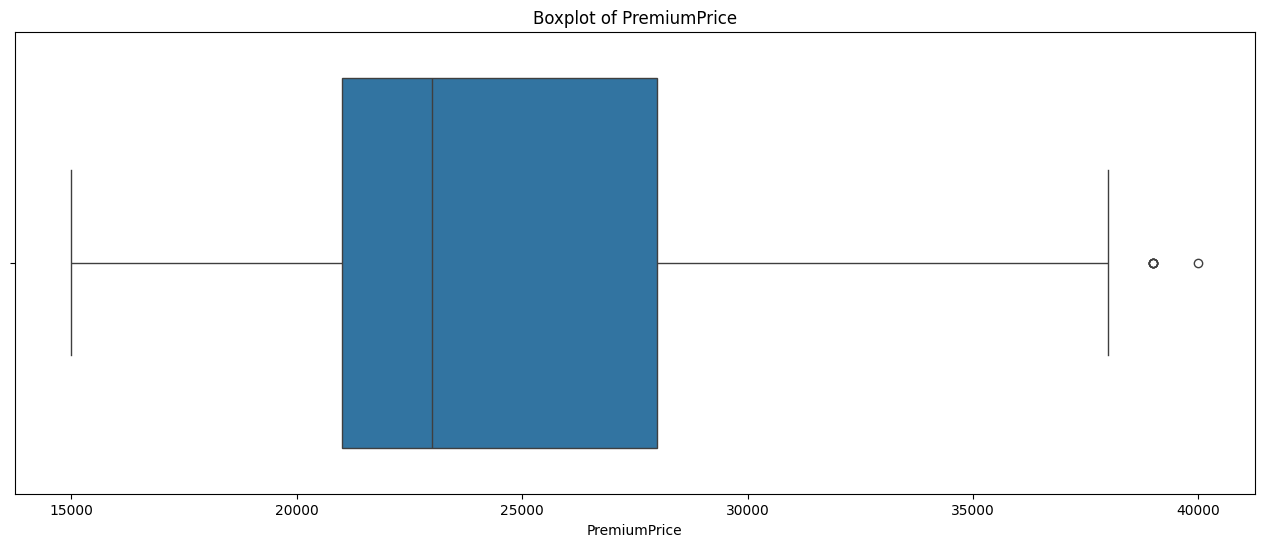

In [9]:
# Plotting distribution of numerical variables
numerical_features = ['Age', 'Height', 'Weight', 'PremiumPrice']

plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

print()
print()
print()
# Boxplot for PremiumPrice
plt.figure(figsize=(16, 6))
sns.boxplot(x='PremiumPrice', data=df)
plt.title('Boxplot of PremiumPrice')
plt.show()


###b. Correlation Analysis:
Generate a correlation matrix and heatmap to explore relationships between numerical features.

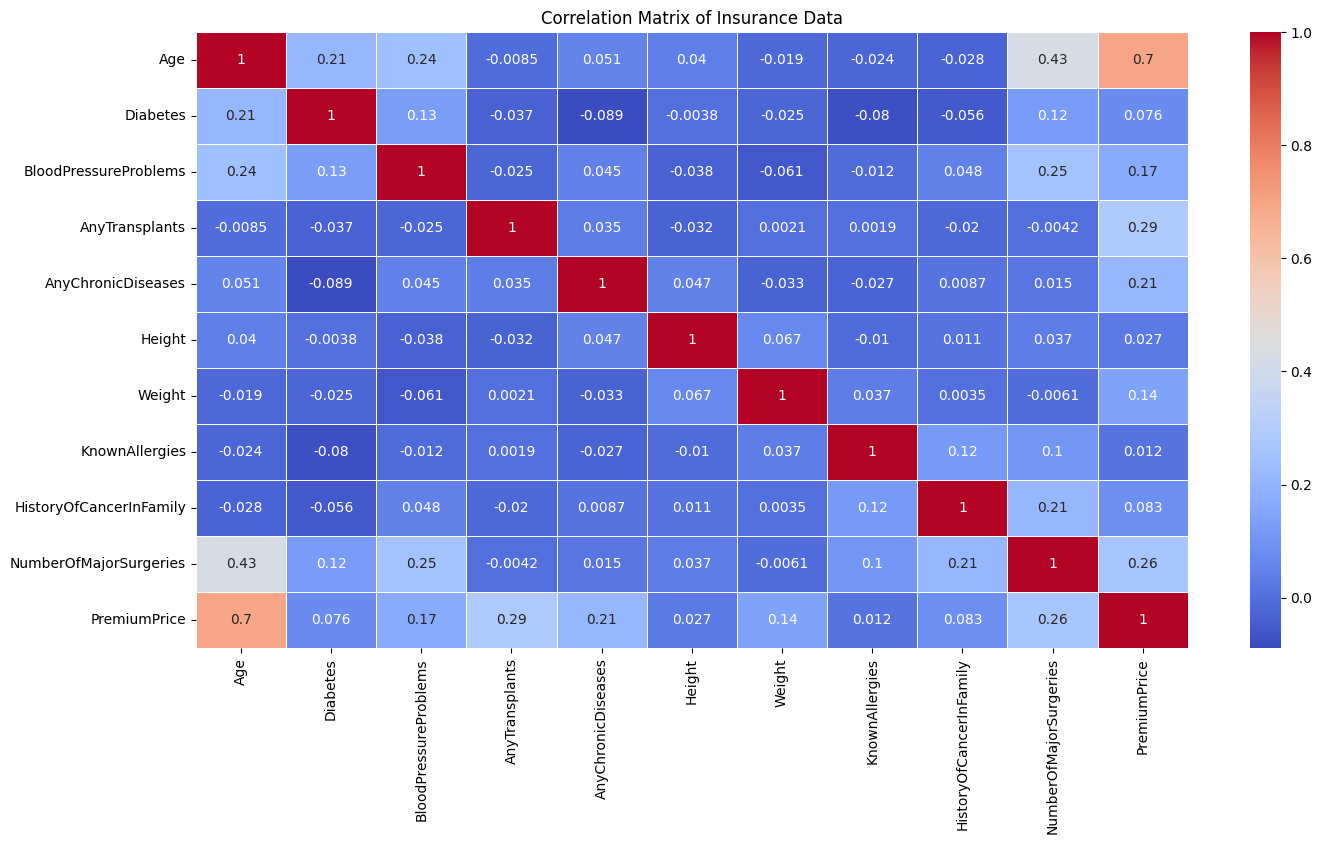

In [10]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Insurance Data')
plt.show()


###c. Outlier Detection:
Outliers can be detected using IQR.

In [11]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in PremiumPrice
outliers_premium = detect_outliers_iqr(df, 'PremiumPrice')
print(f"Outliers in PremiumPrice: \n\n{outliers_premium}")


Outliers in PremiumPrice: 

     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
204   27         0                      1               0                   0   
295   64         1                      1               0                   1   
926   24         0                      1               0                   0   
928   19         0                      0               0                   0   
976   21         0                      1               0                   0   
984   47         1                      1               0                   0   

     Height  Weight  KnownAllergies  HistoryOfCancerInFamily  \
204     159     120               1                        1   
295     163      91               0                        0   
926     159      67               0                        0   
928     171      67               0                        0   
976     155      74               0                        0   
984     158      73 

#Feature Engineering

In [12]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [13]:
df_binned = df.copy()

# Binning Age
df_binned['AgeGroup'] = pd.cut(df_binned['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '30-40', '40-50', '50-60', '60+'])

# Creating a new feature for BMI
# Height is in cm, so converting it to meters for the BMI formula
df_binned['BMI'] = df_binned['Weight'] / (df_binned['Height'] / 100) ** 2

# Binning BMI based on standard BMI categories
df_binned['BMIGroup'] = pd.cut(df_binned['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

df_binned.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeGroup,BMI,BMIGroup
0,45,0,0,0,0,155,57,0,0,0,25000,40-50,23.725286,Normal weight
1,60,1,0,0,0,180,73,0,0,0,29000,50-60,22.530864,Normal weight
2,36,1,1,0,0,158,59,0,0,1,23000,30-40,23.634033,Normal weight
3,52,1,1,0,1,183,93,0,0,2,28000,50-60,27.770313,Overweight
4,38,0,0,0,1,166,88,0,0,1,23000,30-40,31.934969,Obesity


#Hypothesis Testing

###a. T-Test for Binary Features:
We'll perform T-tests to compare the means of PremiumPrice for binary features like Diabetes, BloodPressureProblems, etc.

In [14]:
def t_test_for_binary_column(column_name):
    group1 = df[df[column_name] == 1]['PremiumPrice']
    group0 = df[df[column_name] == 0]['PremiumPrice']

    t_stat, p_value = ttest_ind(group1, group0)
    print(f"\nT-Test for {column_name} and PremiumPrice:")
    print(f"T-statistic: {np.round(t_stat,2)}, P-value: {np.round(p_value,5)}")

    # Conclusion based on p-value
    if p_value < 0.05:
        print(f"Conclusion: There is a statistically significant difference in PremiumPrice for {column_name}.")
    else:
        print(f"Conclusion: There is no statistically significant difference in PremiumPrice for {column_name}.")

# Apply t-test for binary columns
binary_columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases',
                  'KnownAllergies', 'HistoryOfCancerInFamily']
for column in binary_columns:
    t_test_for_binary_column(column)



T-Test for Diabetes and PremiumPrice:
T-statistic: 2.4, P-value: 0.01669
Conclusion: There is a statistically significant difference in PremiumPrice for Diabetes.

T-Test for BloodPressureProblems and PremiumPrice:
T-statistic: 5.32, P-value: 0.0
Conclusion: There is a statistically significant difference in PremiumPrice for BloodPressureProblems.

T-Test for AnyTransplants and PremiumPrice:
T-statistic: 9.47, P-value: 0.0
Conclusion: There is a statistically significant difference in PremiumPrice for AnyTransplants.

T-Test for AnyChronicDiseases and PremiumPrice:
T-statistic: 6.69, P-value: 0.0
Conclusion: There is a statistically significant difference in PremiumPrice for AnyChronicDiseases.

T-Test for KnownAllergies and PremiumPrice:
T-statistic: 0.38, P-value: 0.70427
Conclusion: There is no statistically significant difference in PremiumPrice for KnownAllergies.

T-Test for HistoryOfCancerInFamily and PremiumPrice:
T-statistic: 2.62, P-value: 0.00901
Conclusion: There is a stat

###b. ANOVA for CategoricalFeatures:
We'll use df_binned as it contains manually engineered features

In [15]:
# Function to perform ANOVA
def perform_anova(df_binned, feature):
    groups = [df_binned[df_binned[feature] == group]['PremiumPrice'] for group in df_binned[feature].dropna().unique()]
    f_stat, p_value = f_oneway(*groups)
    return f_stat, p_value

# Perform ANOVA for AgeGroup
f_stat_age, p_value_age = perform_anova(df_binned, 'AgeGroup')
print("ANOVA for AgeGroup:")
print(f"F-statistic: {np.round(f_stat_age, 2)}, p-value: {np.round(p_value_age, 5)}")
if p_value_age < 0.05:
    print("Conclusion: There is a statistically significant difference in PremiumPrice based on AgeGroup.\n")
else:
    print("Conclusion: There is no statistically significant difference in PremiumPrice based on AgeGroup.\n")

# Perform ANOVA for BMIGroup
f_stat_bmi, p_value_bmi = perform_anova(df_binned, 'BMIGroup')
print("ANOVA for BMIGroup:")
print(f"F-statistic: {np.round(f_stat_bmi, 2)}, p-value: {np.round(p_value_bmi, 5)}")
if p_value_bmi < 0.05:
    print("Conclusion: There is a statistically significant difference in PremiumPrice based on BMIGroup.\n")
else:
    print("Conclusion: There is no statistically significant difference in PremiumPrice based on BMIGroup.\n")

# Perform ANOVA for NumberOfMajorSurgeries
f_stat_surgeries, p_value_surgeries = perform_anova(df_binned, 'NumberOfMajorSurgeries')
print("ANOVA for NumberOfMajorSurgeries:")
print(f"F-statistic: {np.round(f_stat_surgeries, 2)}, p-value: {np.round(p_value_surgeries, 5)}")
if p_value_surgeries < 0.05:
    print("Conclusion: There is a statistically significant difference in PremiumPrice based on NumberOfMajorSurgeries.\n")
else:
    print("Conclusion: There is no statistically significant difference in PremiumPrice based on NumberOfMajorSurgeries.\n")

ANOVA for AgeGroup:
F-statistic: 267.09, p-value: 0.0
Conclusion: There is a statistically significant difference in PremiumPrice based on AgeGroup.

ANOVA for BMIGroup:
F-statistic: 4.06, p-value: 0.00702
Conclusion: There is a statistically significant difference in PremiumPrice based on BMIGroup.

ANOVA for NumberOfMajorSurgeries:
F-statistic: 26.14, p-value: 0.0
Conclusion: There is a statistically significant difference in PremiumPrice based on NumberOfMajorSurgeries.



###c. Chi-Square Test for Categorical Variables:
We can perform the Chi-Square test to check for associations between binary features like Diabetes and AnyChronicDiseases.

In [16]:
def chi_square_test(col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"\nChi-Square Test between {col1} and {col2}:")
    print(f"Chi-Square statistic: {np.round(chi2_stat,2)}, P-value: {np.round(p_value,5)}")

    # Conclusion based on p-value
    if p_value < 0.05:
        print(f"Conclusion: There is a significant association between {col1} and {col2}.")
    else:
        print(f"Conclusion: There is no significant association between {col1} and {col2}.")

# Chi-Square Test for Diabetes and AnyChronicDiseases
chi_square_test('Diabetes', 'AnyChronicDiseases')


Chi-Square Test between Diabetes and AnyChronicDiseases:
Chi-Square statistic: 7.42, P-value: 0.00645
Conclusion: There is a significant association between Diabetes and AnyChronicDiseases.


#Model Buiding

###Scale & Split

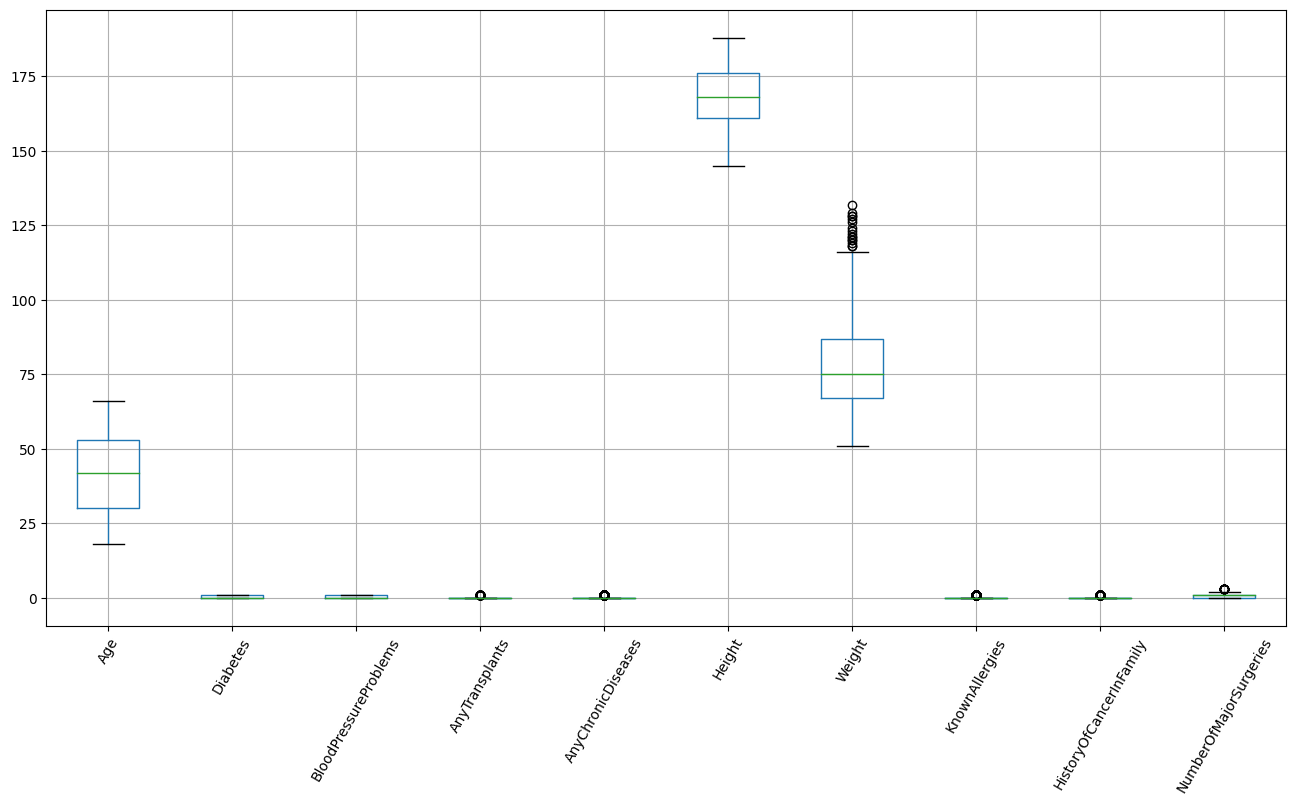

In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

plt.figure(figsize=(16,8))
X.boxplot(column=list(X.columns.values))
plt.xticks(rotation=60)
plt.show()

<font size ='5'> We need to scale features

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(788, 10) (198, 10) (788,) (198,)


In [19]:
X_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
762,19,0,0,0,0,146,55,0,0,0
334,31,0,1,0,0,162,87,0,0,0
890,58,1,0,0,0,147,75,0,0,0
529,31,0,1,0,0,171,85,0,0,0
468,26,1,1,0,0,167,70,0,1,1


In [20]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [21]:
X_train.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,-1.617536,-0.857720,-0.928916,-0.243187,-0.470856,-2.219275,-1.519089,-0.524482,-0.359082,-0.874799
1,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,-0.620930,0.691260,-0.524482,-0.359082,-0.874799
2,1.156620,1.165882,-0.928916,-0.243187,-0.470856,-2.119378,-0.137621,-0.524482,-0.359082,-0.874799
3,-0.763949,-0.857720,1.076524,-0.243187,-0.470856,0.278138,0.553113,-0.524482,-0.359082,-0.874799
4,-1.119610,1.165882,1.076524,-0.243187,-0.470856,-0.121448,-0.482988,-0.524482,2.784880,0.433249


###Linear Regression - Baseline Model

* Train Score: 62.19%
* Test Score: 71.34%

In [22]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model_lr.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_lr.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Train Score: 62.19%
Test Score: 71.34%


###XGBoost Regressor

* Train Accuracy: 83.37%
* Test Accuracy: 84.21%

In [24]:
!pip install xgboost

In [25]:
import xgboost as XGB
model_xgb = XGB.XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
y_pred = model_xgb.predict(X_train)
print(f'Train Accuracy: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_xgb.predict(X_test)
print(f'Test Accuracy: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Train Accuracy: 99.96%
Test Accuracy: 79.87%


<font size='5'> This is clearly overfit

So, tune the hyperparameter "max_depth"

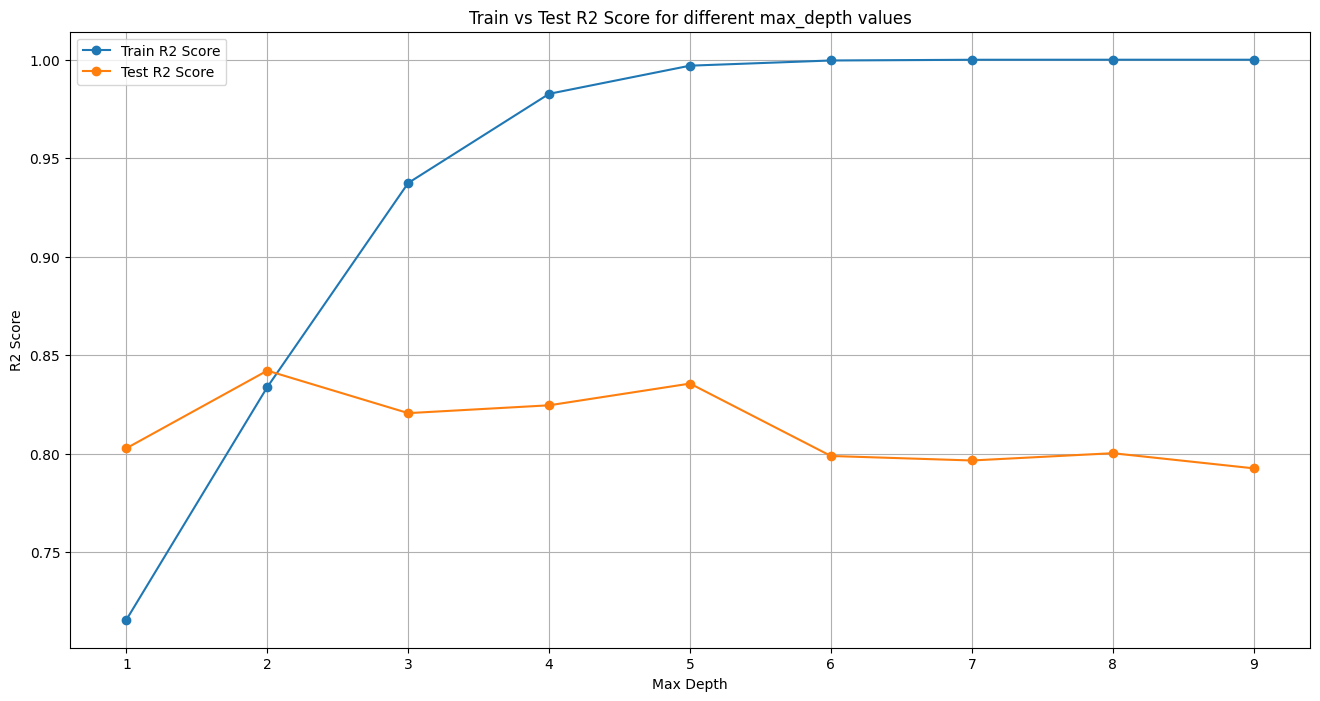

In [27]:
train_scores = []
test_scores = []

for i in range(1, 10):
    model = XGB.XGBRegressor(max_depth=i)
    model.fit(X_train, y_train)

    # Calculate r2 scores for train and test
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))

    # Append the scores to lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(range(1, 10), train_scores, label='Train R2 Score', marker='o')
plt.plot(range(1, 10), test_scores, label='Test R2 Score', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Train vs Test R2 Score for different max_depth values')
plt.legend()
plt.grid(True)
plt.show()

Visual inspection shows that max_depth can be set to 2.

In [28]:
model_xgb = XGB.XGBRegressor(max_depth=2)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_train)
print(f'Train Accuracy: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_xgb.predict(X_test)
print(f'Test Accuracy: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Train Accuracy: 83.37%
Test Accuracy: 84.21%


###DecisionTree Regressor

* Train Accuracy: 81.09%
* Test Accuracy: 84.92%

In [29]:
from sklearn.tree import DecisionTreeRegressor as DTR
model_dtr = DTR()
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
y_pred = model_dtr.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

Train Score: 100.0%


<font size='5'> This is clearly overfit

So, tune the hyperparameter "max_depth"

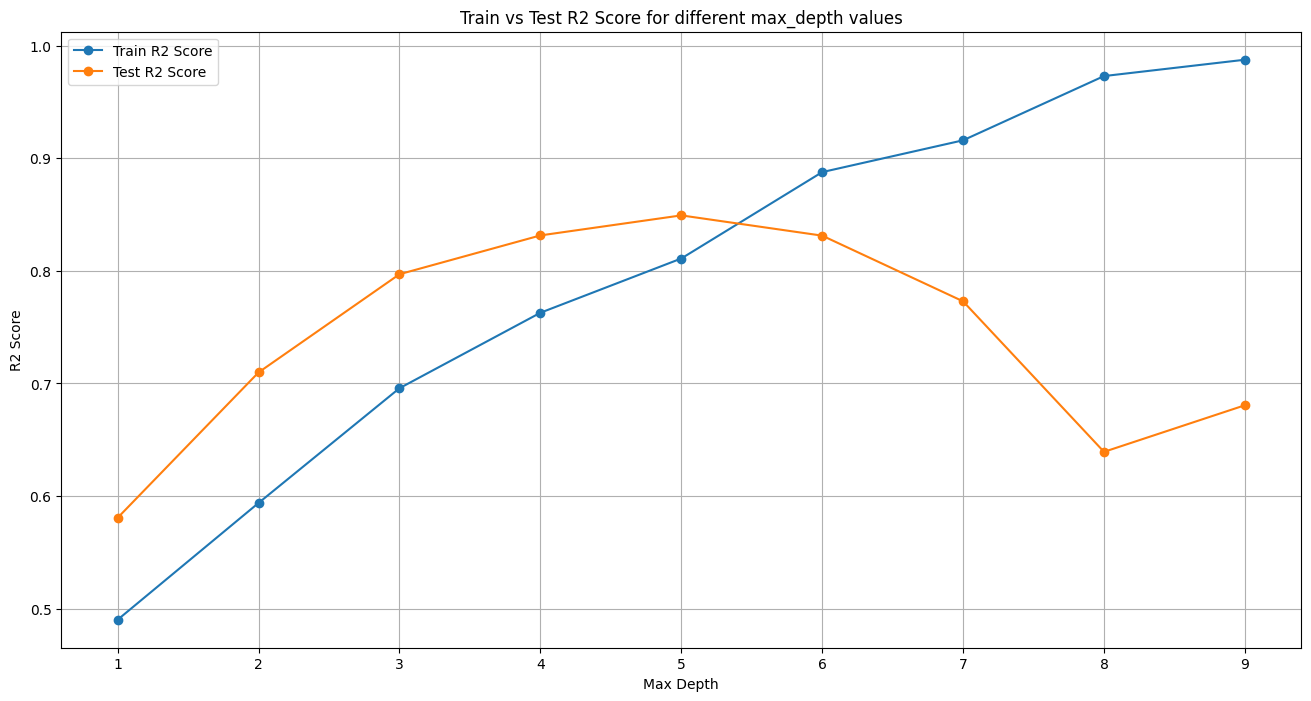

In [31]:
train_scores = []
test_scores = []

for i in range(1, 10):
    model = DTR(max_depth=i)
    model.fit(X_train, y_train)

    # Calculate r2 scores for train and test
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))

    # Append the scores to lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(range(1, 10), train_scores, label='Train R2 Score', marker='o')
plt.plot(range(1, 10), test_scores, label='Test R2 Score', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Train vs Test R2 Score for different max_depth values')
plt.legend()
plt.grid(True)
plt.show()

Visual inspection shows that max_depth can be set to 5.

In [32]:
model_dtr = DTR(max_depth=5)
model_dtr.fit(X_train, y_train)

y_pred = model_dtr.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_dtr.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Train Score: 81.09%
Test Score: 84.92%


###Random Forest Regressor

* Train Score: 93.35%
* Test Score: 88.92%

In [33]:
from sklearn.ensemble import RandomForestRegressor as RFR
model_rfr = RFR(random_state=18)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=18)

In [34]:
y_pred = model_rfr.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_rfr.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Train Score: 96.73%
Test Score: 88.77%


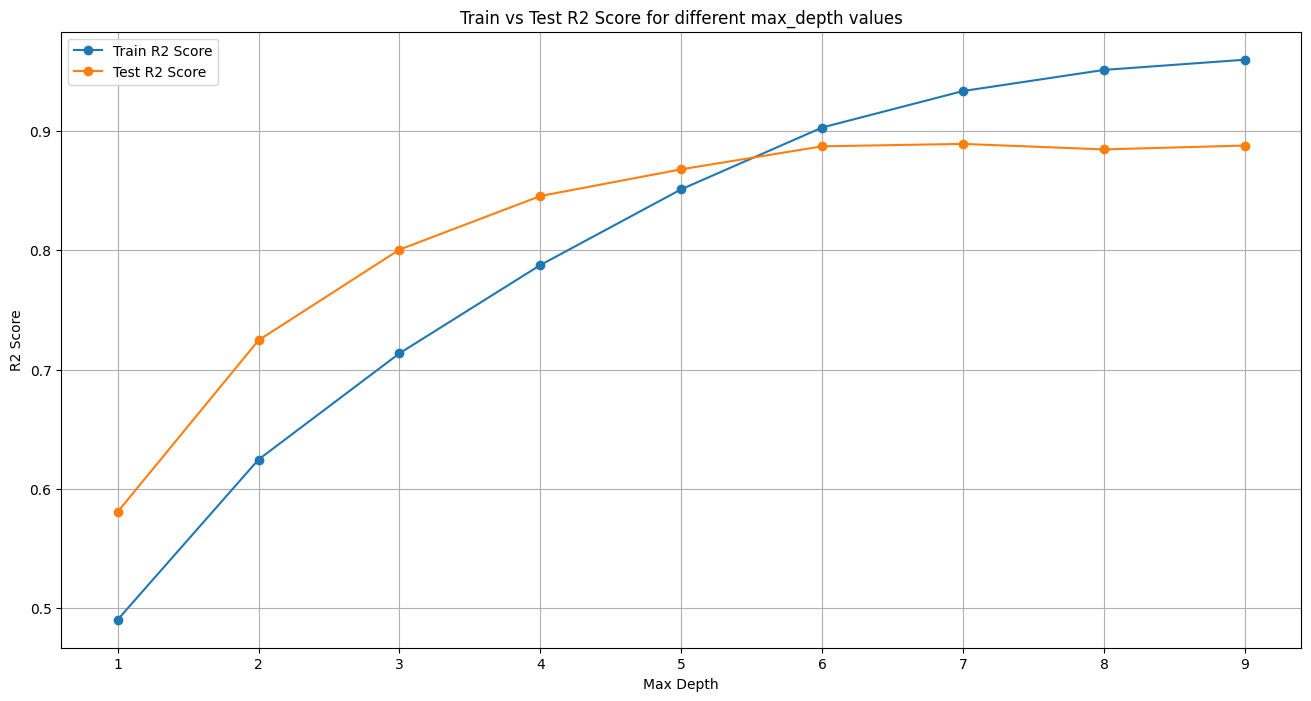

In [35]:
train_scores = []
test_scores = []

for i in range(1, 10):
    model = RFR(max_depth=i, random_state=18)
    model.fit(X_train, y_train)

    # Calculate r2 scores for train and test
    train_r2 = r2_score(y_train, model.predict(X_train))
    test_r2 = r2_score(y_test, model.predict(X_test))

    # Append the scores to lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plot the results
plt.figure(figsize=(16,8))
plt.plot(range(1, 10), train_scores, label='Train R2 Score', marker='o')
plt.plot(range(1, 10), test_scores, label='Test R2 Score', marker='o')

plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.title('Train vs Test R2 Score for different max_depth values')
plt.legend()
plt.grid(True)
plt.show()

Visual inspection shows that max_depth should be set to 7

In [36]:
model_rfr = RFR(max_depth=7, random_state=18)
model_rfr.fit(X_train, y_train)

y_pred = model_rfr.predict(X_train)
print(f'Train Score: {np.round(r2_score(y_train, y_pred)*100,2)}%')

y_pred = model_rfr.predict(X_test)
print(f'Test Score: {np.round(r2_score(y_test, y_pred)*100,2)}%')

Train Score: 93.35%
Test Score: 88.92%


#Final Model
---
<font size='4'>
Random Forest Regressor with max_depth = 7

In [37]:
model_rfr

RandomForestRegressor(max_depth=7, random_state=18)

###Saving the model as a pickle file

In [82]:
import pickle
#save model to pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model_rfr, file)

In [83]:
#load model from pickle file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [84]:
model

RandomForestRegressor(max_depth=7, random_state=18)

###Feature Importance

####Using "feature_importances"

In [71]:
feature_imp = model_rfr.feature_importances_
sorted_idx = feature_imp.argsort()

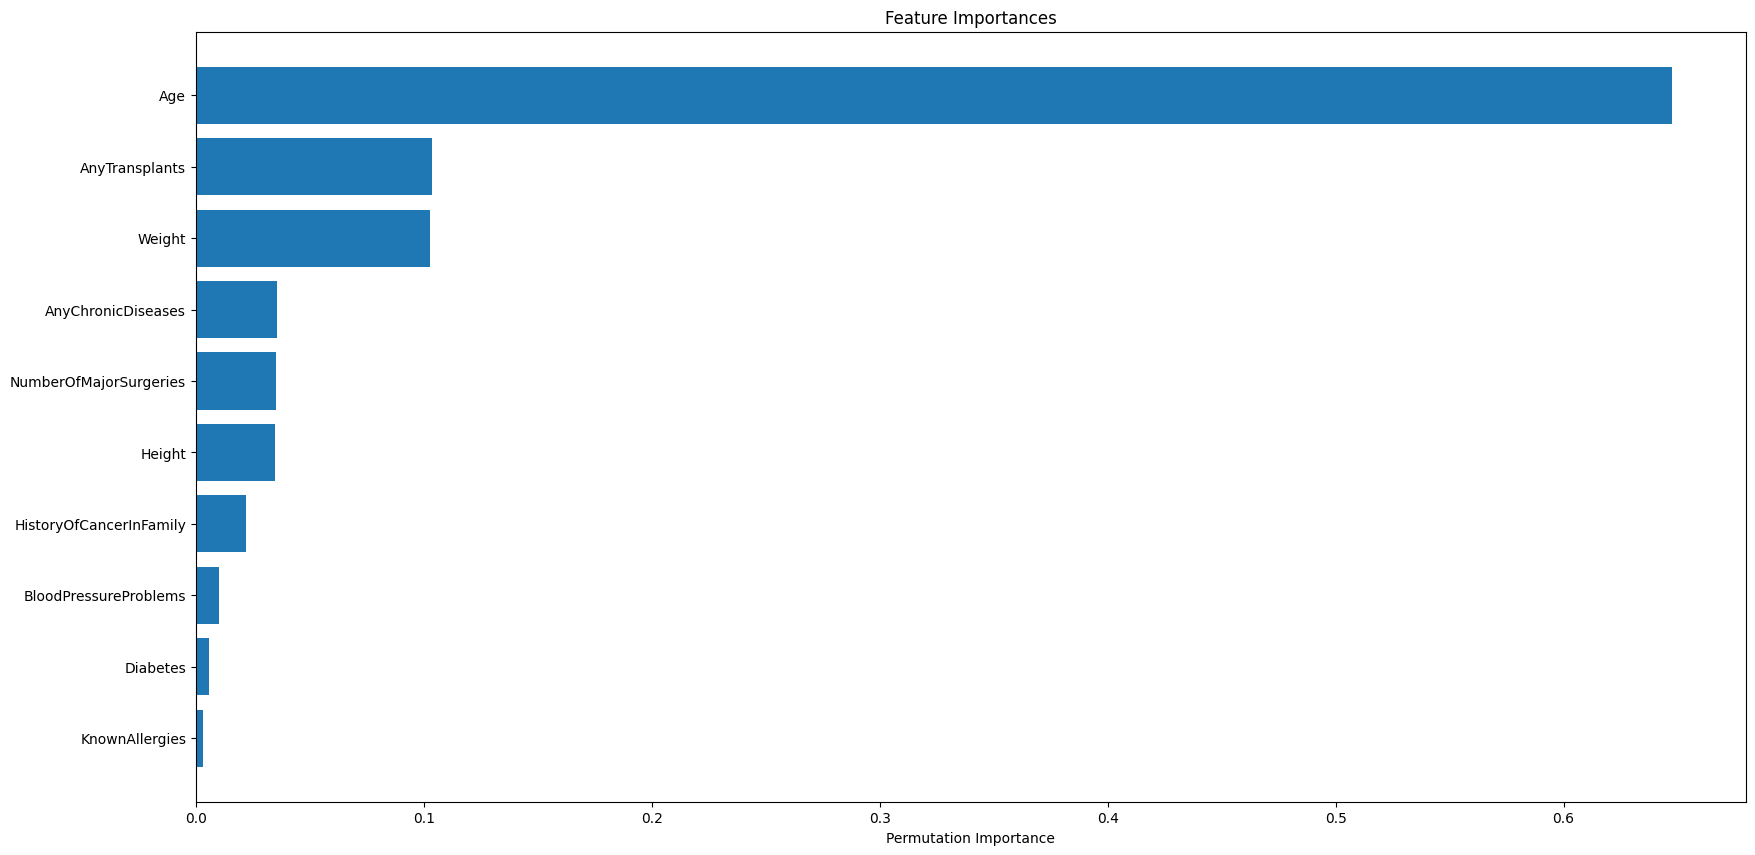

In [72]:
plt.barh(X.columns[sorted_idx], feature_imp[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importances")
plt.show()

####Using "Permutation Importance"

In [65]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model_rfr, X_test, y_test, n_repeats=10, random_state=9)
sorted_idx = perm_importance.importances_mean.argsort()

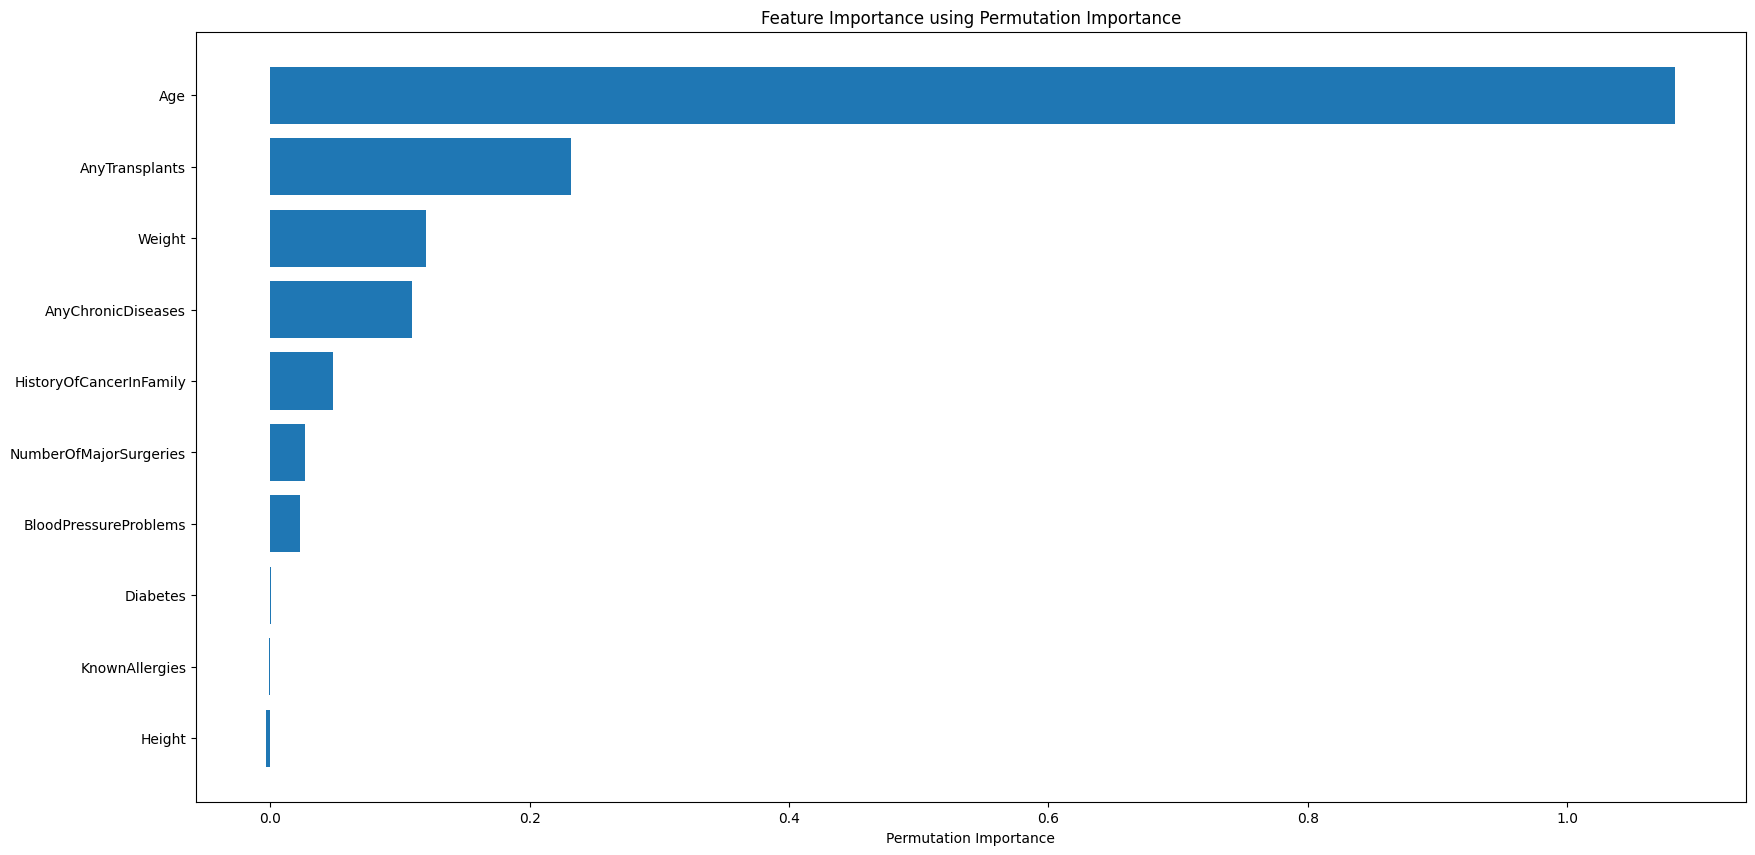

In [70]:
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation Importance")
plt.show()

####Using "shap_values"

In [77]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

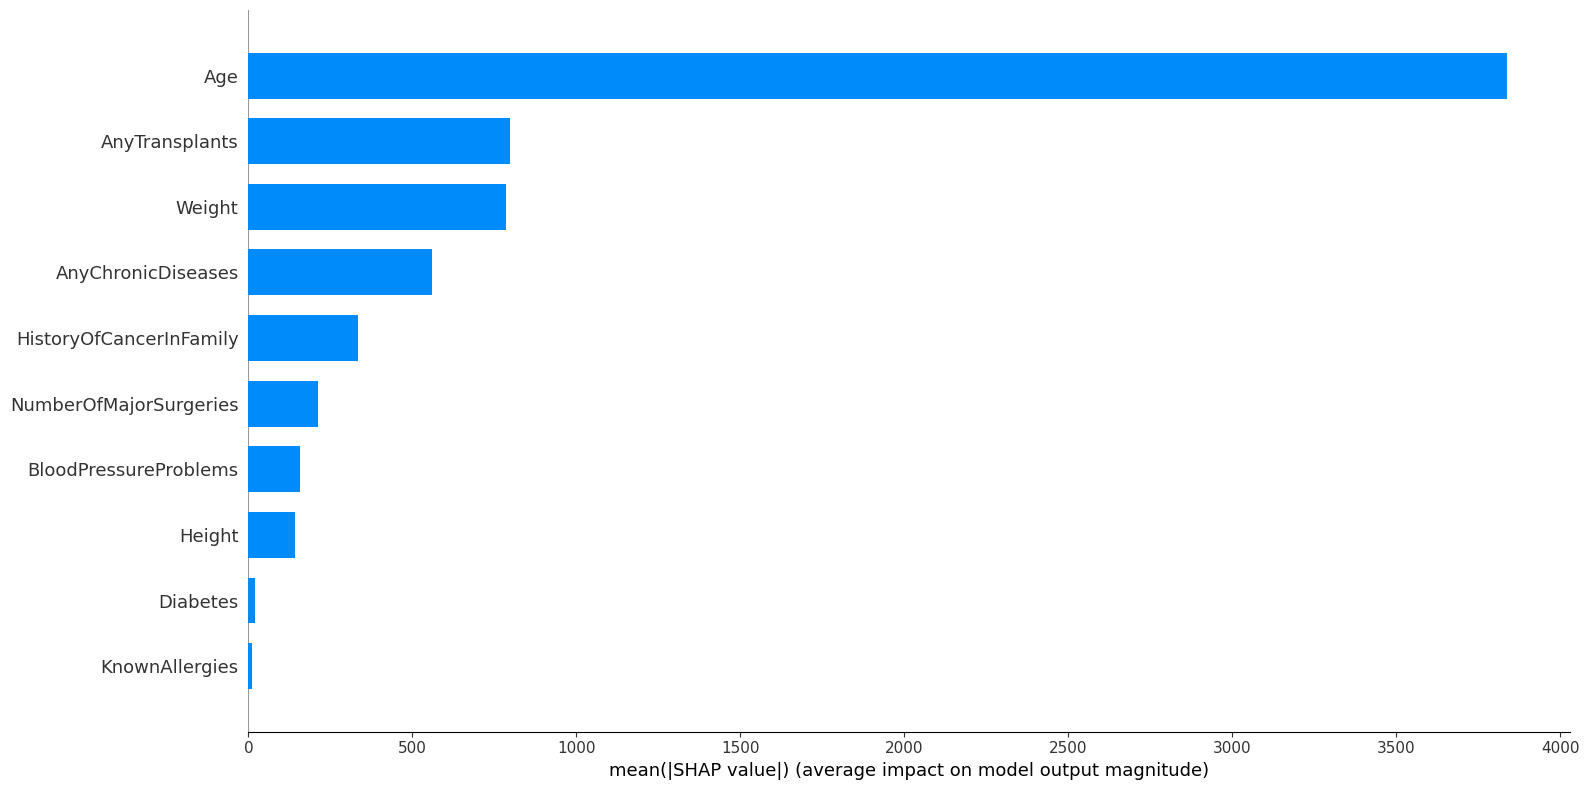

In [80]:
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=[16,8])

##Insights & Recommendations

*
*
*
*
*

#Predictions with 95% Confidence

In [87]:
predictions = model_rfr.predict(X_test)

residuals = y_test - predictions
standard_error = np.std(residuals)

In [88]:
confidence = 0.95
z_value = norm.ppf((1 + confidence) / 2)

In [89]:
prediction_intervals = []
for pred in predictions:
    margin_of_error = z_value * standard_error * np.sqrt(1 + 1 / len(X_test))
    pred_interval = (pred - margin_of_error, pred + margin_of_error)
    prediction_intervals.append(pred_interval)

In [93]:
results_df = pd.DataFrame({
    'Prediction': predictions,
    'Prediction Interval Lower': [pi[0] for pi in prediction_intervals],
    'Prediction Interval Upper': [pi[1] for pi in prediction_intervals]
})

In [94]:
res = y_test.reset_index()
res.drop('index', axis=1, inplace=True)
res.reset_index(inplace=True)
res.head(3)

,index,PremiumPrice
0,0,31000
1,1,31000
2,2,29000


In [95]:
results_df.reset_index(inplace=True)
res_df = pd.merge(res, results_df).drop(columns='index')
res_df.head(3)

,PremiumPrice,Prediction,Prediction Interval Lower,Prediction Interval Upper
0,31000,28917.410736,24649.995203,33184.826269
1,31000,29813.239608,25545.824075,34080.655142
2,29000,30212.220063,25944.804530,34479.635596


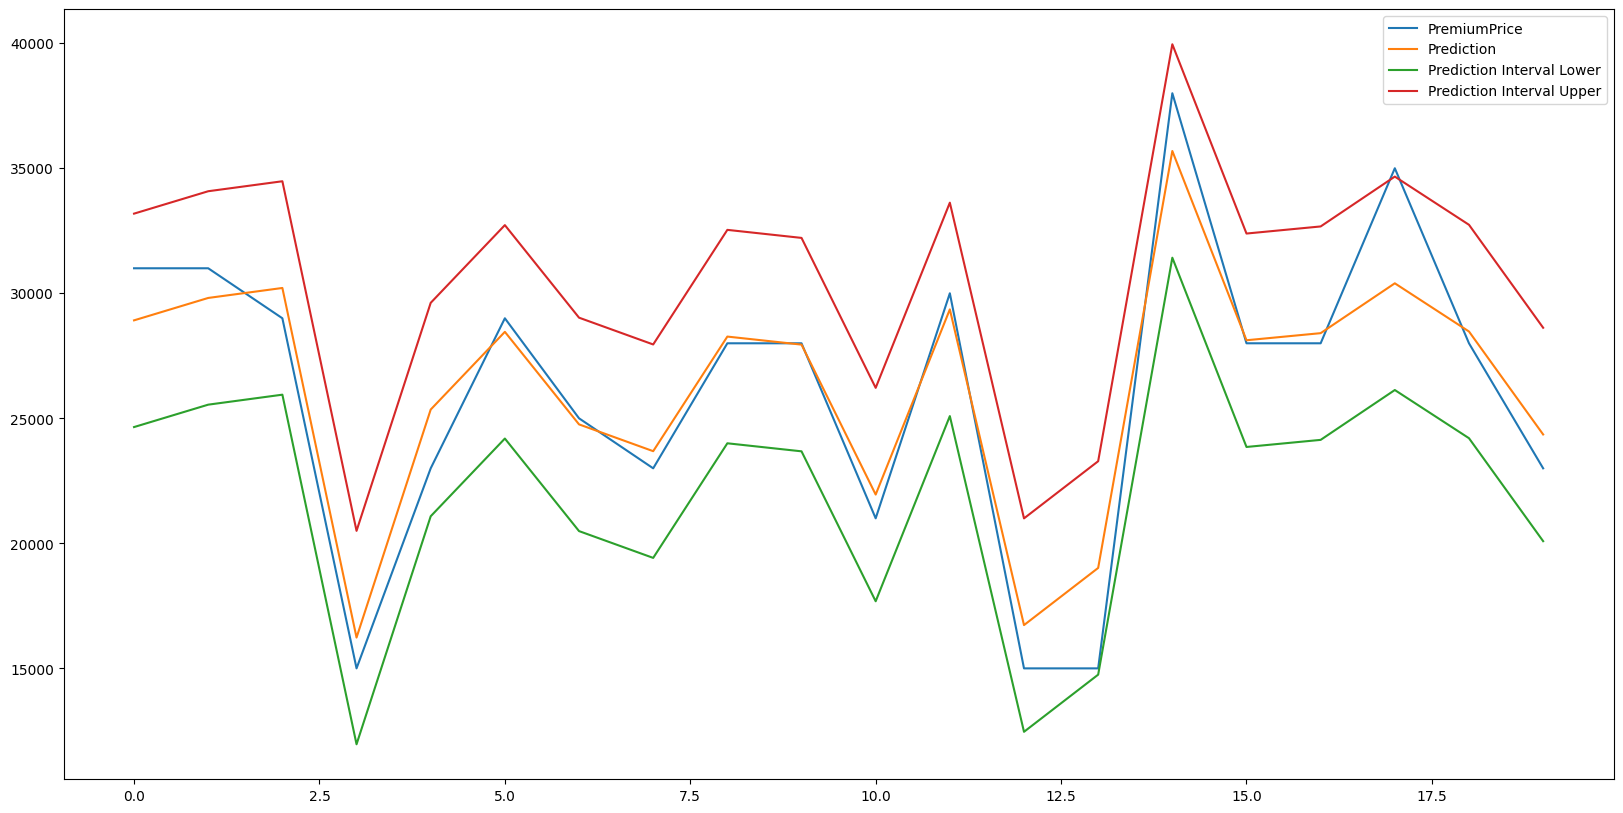

In [96]:
plt.rcParams['figure.figsize'] = (20, 10)
res_df.head(20).plot()
plt.show()

#Practice

In [46]:
# sno = [i for i in range(986)]
# #add this column to existing dataframe 'df'
# df.insert(0, 'sno', sno)
# df.head()

In [47]:
#save this modified dataframe to a csv
# df.to_csv('insurance_1.csv', index=False)